In [156]:
## Libraries to include
library(tidyverse)
library(lubridate)
library(dplyr)
# For Veil of Darkness
library(lutz)
# library(suncalc)
# library(splines)


In [157]:
## Load data
# https://bouldercolorado.gov/open-data/police-stop-demographics/
data_file <- "police_data/police_stop_data_main_2018.csv"
df_stops <- read.csv(data_file, , na.strings="")#IMPORTANT to include the na.strings part to not be misled about NaNs

A=Asian, B=Black or African American, I=American Indian or Alaskan Native, U= Unknown, W=White.

|Column Name|	Description
|:--|:--|
|stopdate|	Date of the stop
|stoptime|	Time (in 24 hour format) when the stop began.
|streetnbr|	Street number where stop occurred
|streetdir|	Direction of street. Not currently used by Boulder Police Department officers.
|street|	Street or intersection where stop occurred
|Min|	Duration of the stop, in minutes. Rounded to 5 minute intervals.
|sex|	Sex of the individual stopped. In most cases, this is collected from the individual's driver's license or identification card. M= male, F= female.
|race|	Race of the individual stopped. Identified by the police officer; see Methods document for more details on this process. A=Asian, B=Black or African American, I=American Indian or Alaskan Native, U= Unknown, W=White.
|ethnic|	Ethnicity of the individual stopped. Identified by the police officer; see Methods document for more details on this process. H=Hispanic, N=Non-Hispanic.
|Year of birth|	Year of birth of the individual stopped. In most cases, this is collected from the individual's driver's license or identification card. Typos may be present due to manual entry of this field.
|enfaction|	Whether the individual is a city of Boulder resident. Y= yes, Boulder resident. N=no, Non-Boulder resident. This may be collected from the individual's driver's license or identification card, or reported by the individual.
|rpmainid|	Unique identifier for the stop. Use this field to merge with "appid" in the Results dataset.
|appkey	| Type of Police activity as part of the stop. RPT1=Type of Stop, RPT2=Stop Reason, RPT3=Search Conducted, RPT4=Search Authority, RPT5=Contraband Found, RPT6=Result of Stop, RPT7=Charge.
|appid|	Unique identifier for the stop. Use this field to merge with "rpmainid" in the Main dataset.



In [158]:
colnames(df_stops)

str(df_stops)

head(df_stops)

[1] "stopdate"      "stoptime"      "streetnbr"     "streetdir"    
 [5] "street"        "Min"           "sex"           "race"         
 [9] "ethnic"        "Year.of.birth" "enfaction"     "rpmainid"

'data.frame':	8215 obs. of  12 variables:
 $ stopdate     : Factor w/ 369 levels " 01/01/2018",..: 1 1 368 368 368 368 2 2 2 2 ...
 $ stoptime     : int  1619 1630 214 214 214 2213 736 756 1207 1530 ...
 $ streetnbr    : Factor w/ 619 levels "1","100","100 BLK",..: 462 561 172 172 172 189 491 491 142 NA ...
 $ streetdir    : logi  NA NA NA NA NA NA ...
 $ street       : Factor w/ 1303 levels "1000 CANYON",..: 525 503 623 623 623 945 605 605 331 832 ...
 $ Min          : int  5 10 35 35 350 10 18 18 10 10 ...
 $ sex          : Factor w/ 2 levels "F","M": 2 2 2 2 2 1 2 2 1 NA ...
 $ race         : Factor w/ 5 levels "A","B","I","U",..: 5 5 5 5 5 5 5 5 5 NA ...
 $ ethnic       : Factor w/ 2 levels "H","N": 2 2 2 2 2 2 2 2 2 NA ...
 $ Year.of.birth: int  1976 2000 1991 1992 1958 2000 1975 1990 1976 1961 ...
 $ enfaction    : Factor w/ 2 levels "N","Y": 2 1 1 1 1 1 2 1 1 2 ...
 $ rpmainid     : int  2862 2863 2864 2865 2866 2867 2868 2869 2870 2871 ...


stopdate,stoptime,streetnbr,streetdir,street,Min,sex,race,ethnic,Year.of.birth,enfaction,rpmainid
01/01/2018,1619,4561,NA,ARAPAHOE AVE/MACARTHUR DR,5,M,W,N,1976,Y,2862
01/01/2018,1630,6600,NA,ARAPAHOE AVE,10,M,W,N,2000,N,2863
12/31/2017,214,1799,NA,BROADWAY/CANYON BLVD,35,M,W,N,1991,N,2864
12/31/2017,214,1799,NA,BROADWAY/CANYON BLVD,35,M,W,N,1992,N,2865
12/31/2017,214,1799,NA,BROADWAY/CANYON BLVD,350,M,W,N,1958,N,2866
12/31/2017,2213,1900,NA,IRIS AVE,10,F,W,N,2000,N,2867


In [203]:
library(skimr) #for easy descriptive statistics
skim_to_wide(df_stops)

type,variable,missing,complete,n,n_unique,top_counts,ordered,mean,sd,p0,p25,p50,p75,p100,hist,count
factor,enfaction,123,7923,8046,2,"N: 4553, Y: 3370, NA: 123",FALSE,NA,NA,NA,NA,NA,NA,NA,NA,NA
factor,ethnic,0,8046,8046,2,"N: 7383, H: 663, NA: 0",FALSE,NA,NA,NA,NA,NA,NA,NA,NA,NA
factor,race,0,8046,8046,5,"W: 7352, B: 346, A: 306, I: 33",FALSE,NA,NA,NA,NA,NA,NA,NA,NA,NA
factor,sex,0,8046,8046,2,"M: 5301, F: 2745, NA: 0",FALSE,NA,NA,NA,NA,NA,NA,NA,NA,NA
factor,stopdate,0,8046,8046,368,"03: 86, 03: 63, 10: 63, 02: 58",FALSE,NA,NA,NA,NA,NA,NA,NA,NA,NA
factor,street,67,7979,8046,1286,"ARA: 364, CAN: 289, 30T: 222, FOO: 186",FALSE,NA,NA,NA,NA,NA,NA,NA,NA,NA
factor,streetnbr,1945,6101,8046,611,"NA: 1945, 698: 157, 899: 127, 119: 126",FALSE,NA,NA,NA,NA,NA,NA,NA,NA,NA
integer,Min,0,8046,8046,NA,NA,NA,11.42,12.23,0,8,10,10,460,<U+2587><U+2581><U+2581><U+2581><U+2581><U+2581><U+2581><U+2581>,NA
integer,rpmainid,0,8046,8046,NA,NA,NA,6999.12,2373.4,2862,4939.25,7010.5,9055.75,11095,<U+2587><U+2587><U+2587><U+2587><U+2587><U+2587><U+2587><U+2587>,NA
integer,stoptime,0,8046,8046,NA,NA,NA,1268.23,635.42,0,915,1242.5,1715,2359,<U+2585><U+2581><U+2583><U+2587><U+2587><U+2586><U+2583><U+2586>,NA


In [160]:
# library(tidyr)
df_stops <- df_stops %>% drop_na(sex, race,ethnic)

In [161]:
cat('In 2018, Boulder had this many traffic stops:',nrow(df_stops))

In 2018, Boulder had this many traffic stops: 8046

## Check for NANs

In [162]:
## Check for NAs
anyNA(df_stops)
sapply(df_stops,function(x) sum(is.na(x)))

[1] TRUE

stopdate      stoptime     streetnbr     streetdir        street 
            0             0          1945          8046            67 
          Min           sex          race        ethnic Year.of.birth 
            0             0             0             0             0 
    enfaction      rpmainid 
          123             0

### Filter rows that meet a condition
filter is for rows, select is for columns

In [163]:
youth_stops <- filter(df_stops, Year.of.birth < 2000)
nrow(youth_stops)

[1] 7744

### Filter out specified columns
Returns a new df with just these 2 columns

In [164]:
df_stops_subset <- select(df_stops, stopdate, Min, sex,race,ethnic,Year.of.birth,rpmainid) 
head(df_stops_subset)

stopdate,Min,sex,race,ethnic,Year.of.birth,rpmainid
01/01/2018,5,M,W,N,1976,2862
01/01/2018,10,M,W,N,2000,2863
12/31/2017,35,M,W,N,1991,2864
12/31/2017,35,M,W,N,1992,2865
12/31/2017,350,M,W,N,1958,2866
12/31/2017,10,F,W,N,2000,2867


In [165]:
df_stops_subset <- mutate(df_stops_subset, 
                    stop_month = month(as.POSIXlt(df_stops_subset[['stopdate']], format="%m/%d/%Y")), 
                   stop_year = year(as.POSIXlt(df_stops_subset[['stopdate']], format="%m/%d/%Y")))

head(df_stops_subset)

stopdate,Min,sex,race,ethnic,Year.of.birth,rpmainid,stop_month,stop_year
01/01/2018,5,M,W,N,1976,2862,1,2018
01/01/2018,10,M,W,N,2000,2863,1,2018
12/31/2017,35,M,W,N,1991,2864,12,2017
12/31/2017,35,M,W,N,1992,2865,12,2017
12/31/2017,350,M,W,N,1958,2866,12,2017
12/31/2017,10,F,W,N,2000,2867,12,2017


In [166]:
#number of stops by race
df_stops_subset %>% 
  count(race)

race,n
A,306
B,346
I,33
U,9
W,7352


In [167]:
# #fraction of stops by race
df_stops_subset %>% 
  count(race) %>% 
  mutate(proportion = n / sum(n))

race,n,proportion
A,306,0.038031320
B,346,0.043002734
I,33,0.004101417
U,9,0.001118568
W,7352,0.913745961


In [168]:
# ggplot(df_stops_subset, aes(race, Min)) + geom_boxplot()
# ggplot(df_stops_subset, aes(sex, Min)) + geom_boxplot()
# ggplot(df_stops_subset, aes(ethnic, Min)) + geom_boxplot()

Warning message in plot.window(xlim, ylim, "", ...):
""stat" is not a graphical parameter"Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
""stat" is not a graphical parameter"Warning message in axis(1, ...):
""stat" is not a graphical parameter"Warning message in axis(2, ...):
""stat" is not a graphical parameter"

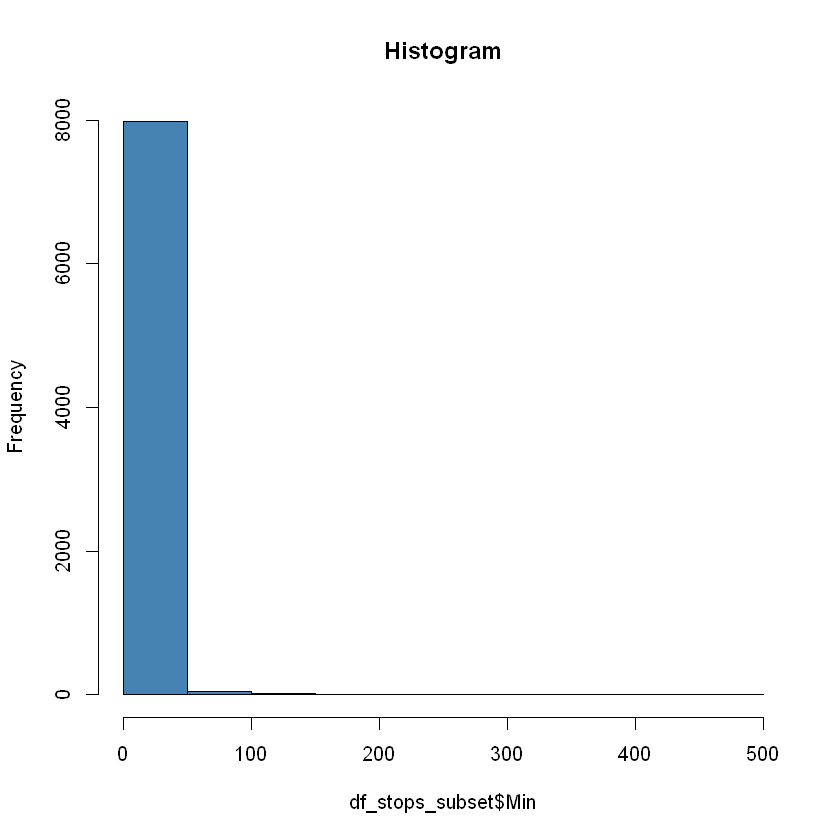

In [169]:
## Frequency histogram  

hist(df_stops_subset$Min,
     col='steelblue',
     main='Histogram',stat = "count",
    )

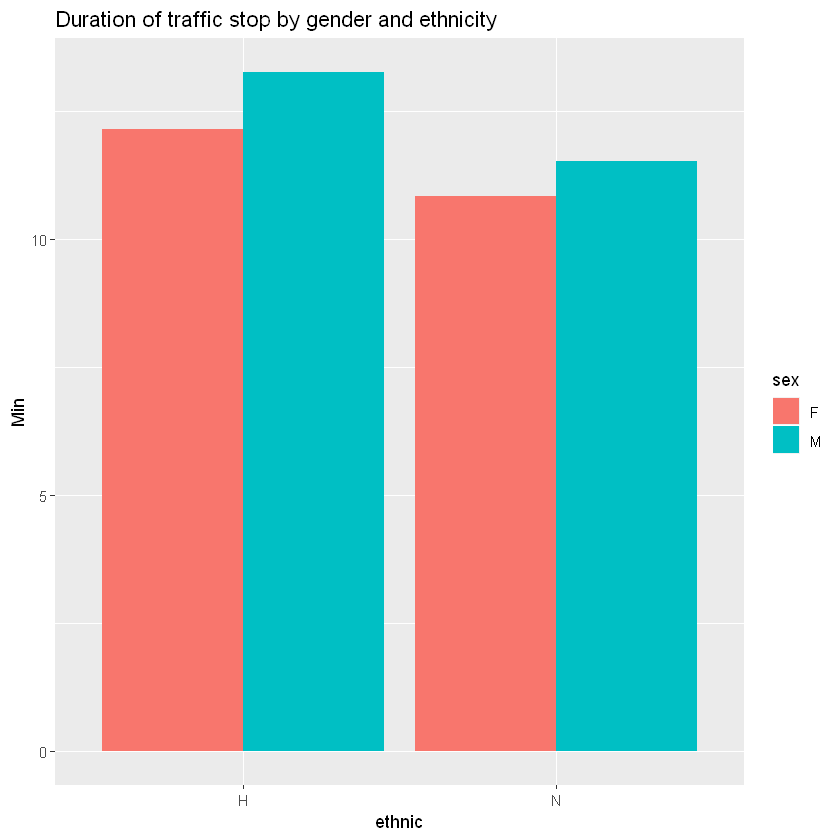

In [170]:
##Bar plot 1
barplot1 <- ggplot(df_stops_subset, aes(y = Min, x = ethnic))+
  geom_bar(
    aes(fill = sex), stat = "summary", fun.y = "mean",
    position = position_dodge(.9))

barplot1 + ggtitle("Duration of traffic stop by gender and ethnicity")

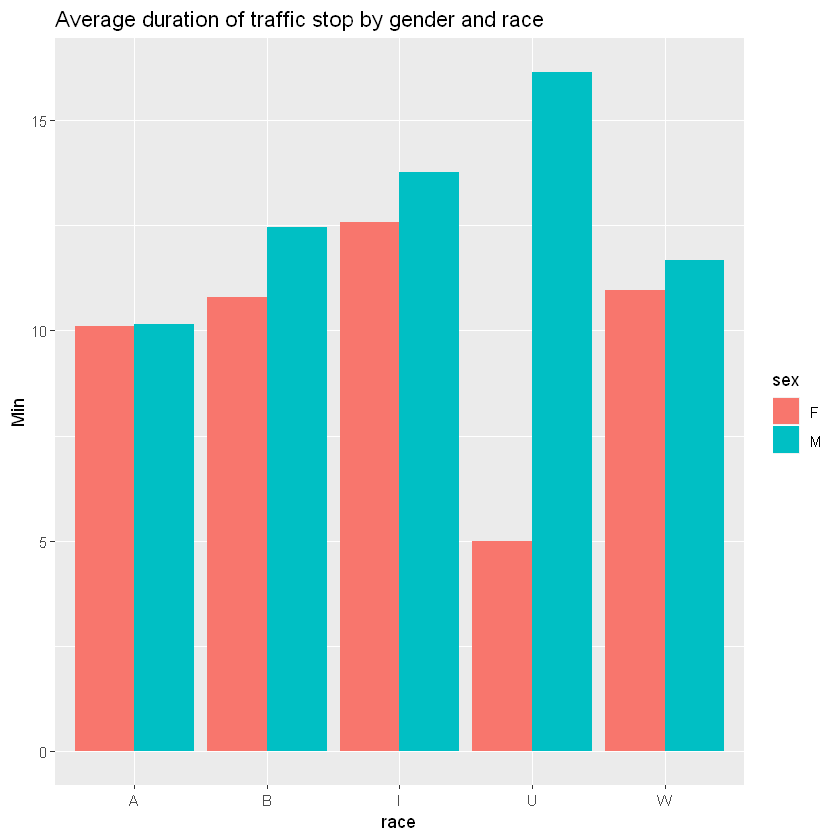

In [171]:
##Bar plot 3
barplot3 <- ggplot(df_stops_subset, aes(y = Min, x = race))+
  geom_bar(
    aes(fill = sex), stat = "summary", fun.y = "mean",
    position = position_dodge(.9))

barplot3 + ggtitle("Average duration of traffic stop by gender and race")

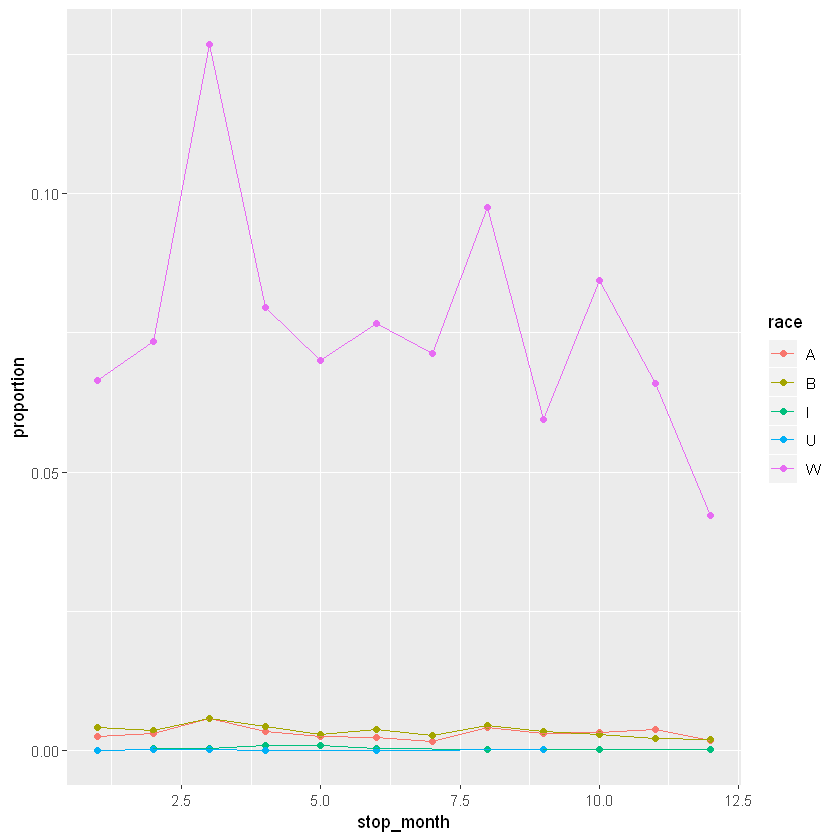

In [172]:
# This method uses the group_by/summarize paradigm
df_stops_subset %>% 
  group_by(race, stop_month) %>% 
  summarize(
    n = n(),
    proportion = n / nrow(.)  ) %>% 
  ggplot(aes(x = stop_month, y = proportion, color = race)) +
  geom_point() +
  geom_line() 

In [ ]:
# df_stops_subset %>% 
#   # notice that you can also mutate `date` *within* the count funciton
#   count(stop_month, race)

In [174]:
# sapply(df_stops_subset, class)


In [ ]:
# test = subset(df_stops_subset, select = c(stop_month, Year.of.birth,Min) )

# data_correls <- abs(cor(test))
# data_correls

In [177]:
library(ggplot2)

### Identify Outliers
Year of birth ranges from 0 to 2998

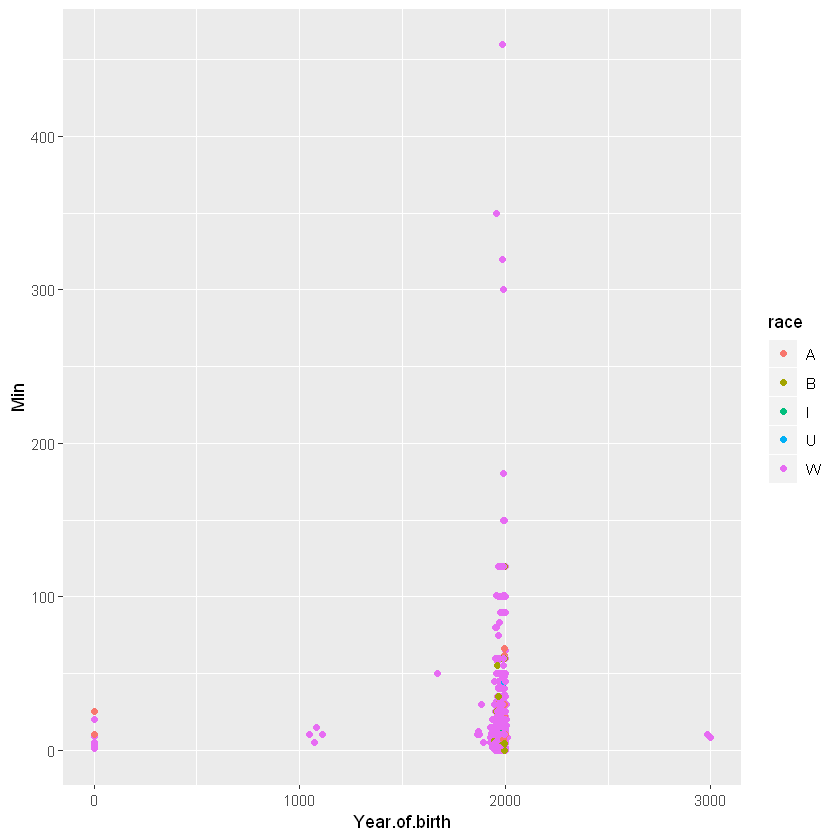

In [182]:
ggplot(data = df_stops_subset, mapping = aes(x = Year.of.birth, y = Min)) + 
    geom_point(mapping=aes(color = race)) 

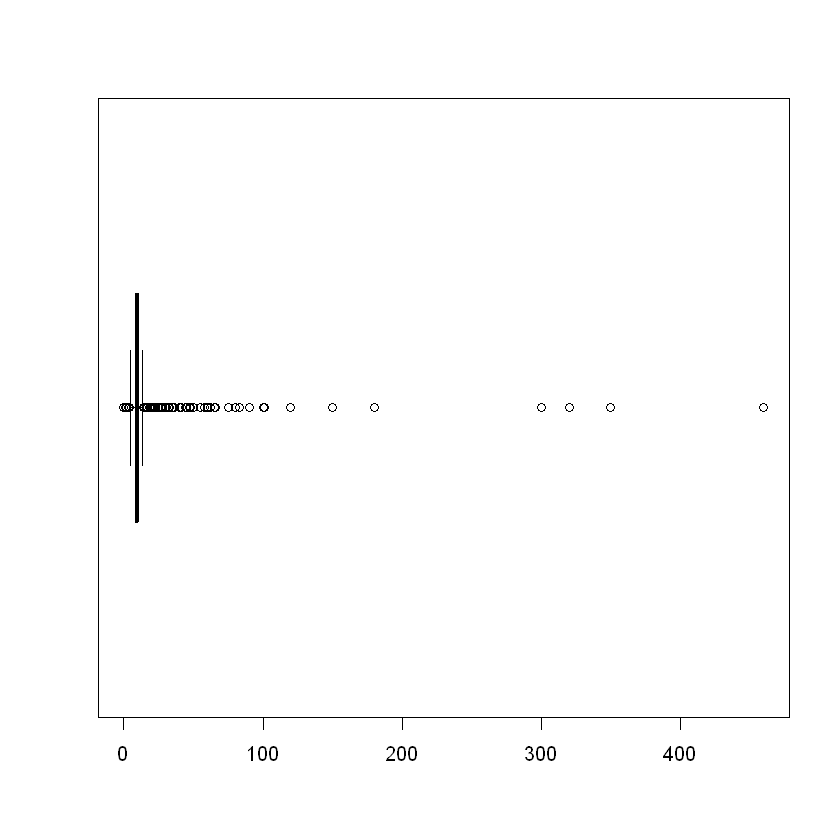

In [179]:
boxplot(df_stops_subset$Min, 
        horizontal=TRUE,
#         xlab = 'Incidence/1000 people',
#         main='Box plot of TB incidence',
        col="orange")

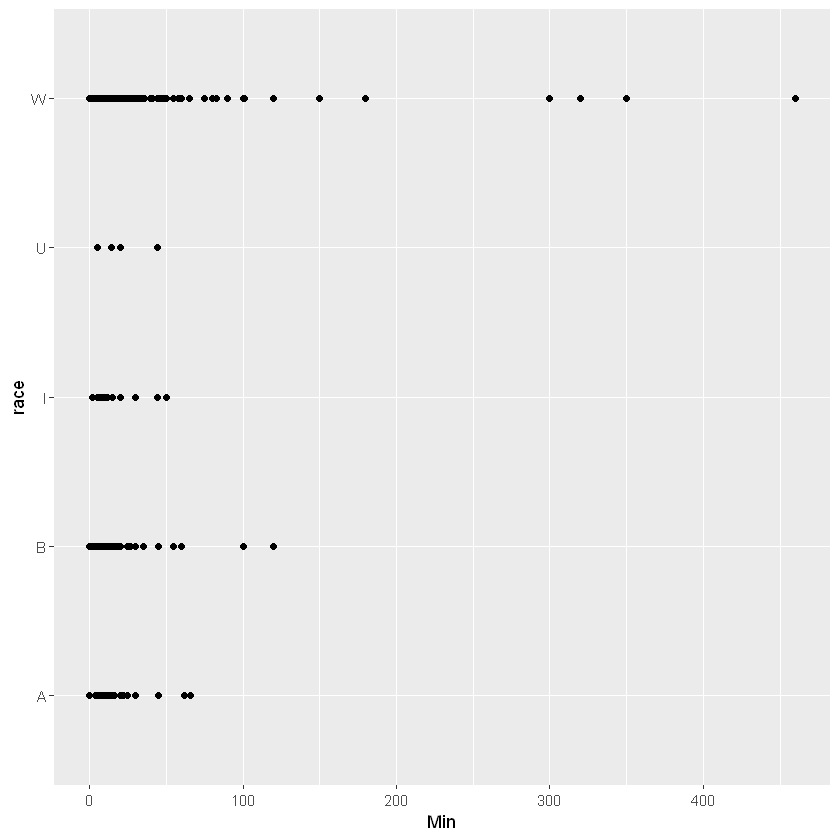

In [183]:
ggplot(data=df_stops_subset) +
    geom_point(mapping=aes(x=Min, y=race))

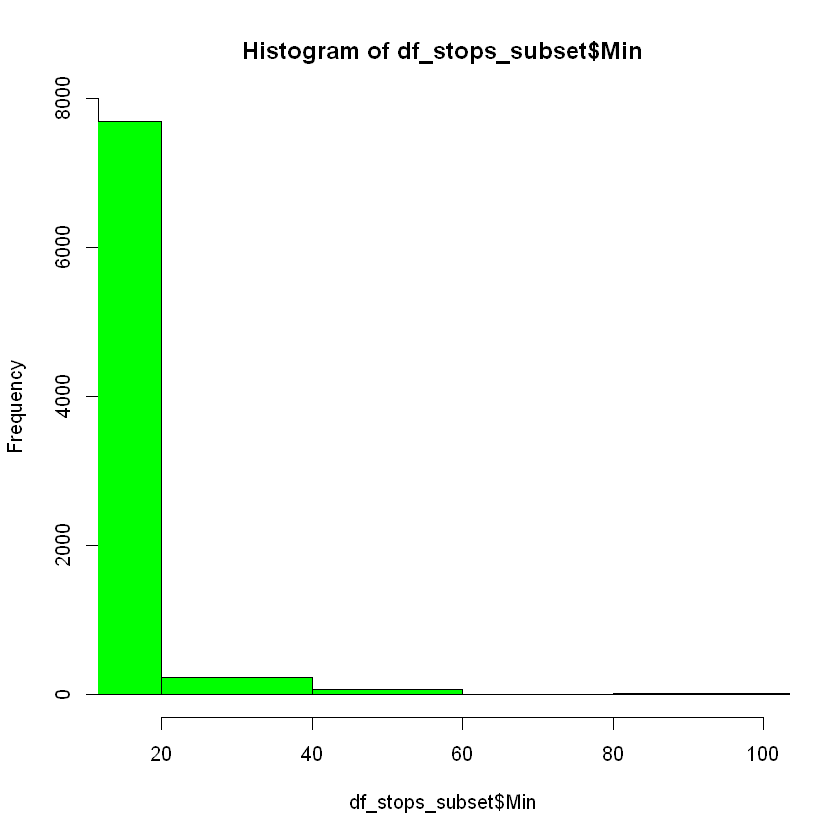

In [184]:
#frequency df_stops_subset
hist(df_stops_subset$Min, 
      breaks=30,
#      xlab = 'Incidence/1000 people',
#      main='Frequency histogram of TB incidence',
     xlim=c(15,100),
     col="green")

In [185]:
# census data

race_census <- c("W","B",
               "I","A",
               "U"
#                "White- Hispanic"
                )
percent_census <- c(87.9,1.1,0.3,5.3,3.5
#                     #9.3
                   )

boulder_census <- data.frame(race_census, percent_census)
boulder_census

race_census,percent_census
W,87.9
B,1.1
I,0.3
A,5.3
U,3.5


In [186]:
# Join stops and census data
df_stops_subset %>% 
  count(race) %>% 
  left_join(
    boulder_census,
    by = "race_census"
  ) %>% 
  mutate(stop_rate = n / num_people)

ERROR: `by` can't contain join column `race_census` which is missing from LHS

In [196]:
library(corrplot) #correlation plot
library(fastDummies) #useful for one hot encoding
library(caret)

In [197]:
df_stops_subset2 <- select(df_stops_subset, race, Min, sex,ethnic,Year.of.birth,rpmainid,stop_month,stop_year) 
head(df_stops_subset2)

race,Min,sex,ethnic,Year.of.birth,rpmainid,stop_month,stop_year
W,5,M,N,1976,2862,1,2018
W,10,M,N,2000,2863,1,2018
W,35,M,N,1991,2864,12,2017
W,35,M,N,1992,2865,12,2017
W,350,M,N,1958,2866,12,2017
W,10,F,N,2000,2867,12,2017


In [198]:
# Partition Step 1 - Set the random seed
set.seed(50)

# Partition Step 2 - Get row numbers for the training data
trainRowNums <- createDataPartition(df_stops_subset2$race, 
                                    p=0.8, list=FALSE)

# Partition Step 3 - Make the (80%) training set
trainData <- df_stops_subset2[trainRowNums,]

# Partition Step 4 - Make the (20%) test set
testData <- df_stops_subset2[-trainRowNums,]

# Store X and Y for later use.
x = trainData[, !names(trainData) == c("Min")]
y = trainData$Min

In [199]:
test_model <- dummyVars(Min~ .,data=trainData)
test_model

Dummy Variable Object

Formula: Min ~ .
8 variables, 3 factors
Variables and levels will be separated by '.'
A less than full rank encoding is used

In [201]:
## One-Hot 
# Creating dummy variables is converting a categorical variable to as many binary variables as here are categories.
dummies_model <- dummyVars(Min ~ ., data=df_stops_subset2)

# Create the dummy variables using predict. The Y variable (BREEDINGCATEGORY) will not be present in trainData_mat.
trainData_mat <- predict(dummies_model, newdata = trainData)

# # Convert to dataframe
trainData_oneHot <- data.frame(trainData_mat)

# # See the structure of the new dataset
str(trainData_oneHot)

'data.frame':	6439 obs. of  13 variables:
 $ race.A       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ race.B       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ race.I       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ race.U       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ race.W       : num  1 1 1 1 1 1 1 1 1 1 ...
 $ sex.F        : num  0 0 0 0 1 0 0 1 0 1 ...
 $ sex.M        : num  1 1 1 1 0 1 1 0 1 0 ...
 $ ethnic.H     : num  0 0 0 0 0 0 0 0 0 0 ...
 $ ethnic.N     : num  1 1 1 1 1 1 1 1 1 1 ...
 $ Year.of.birth: num  1976 2000 1992 1958 2000 ...
 $ rpmainid     : num  2862 2863 2865 2866 2867 ...
 $ stop_month   : num  1 1 12 12 12 1 1 1 1 1 ...
 $ stop_year    : num  2018 2018 2017 2017 2017 ...


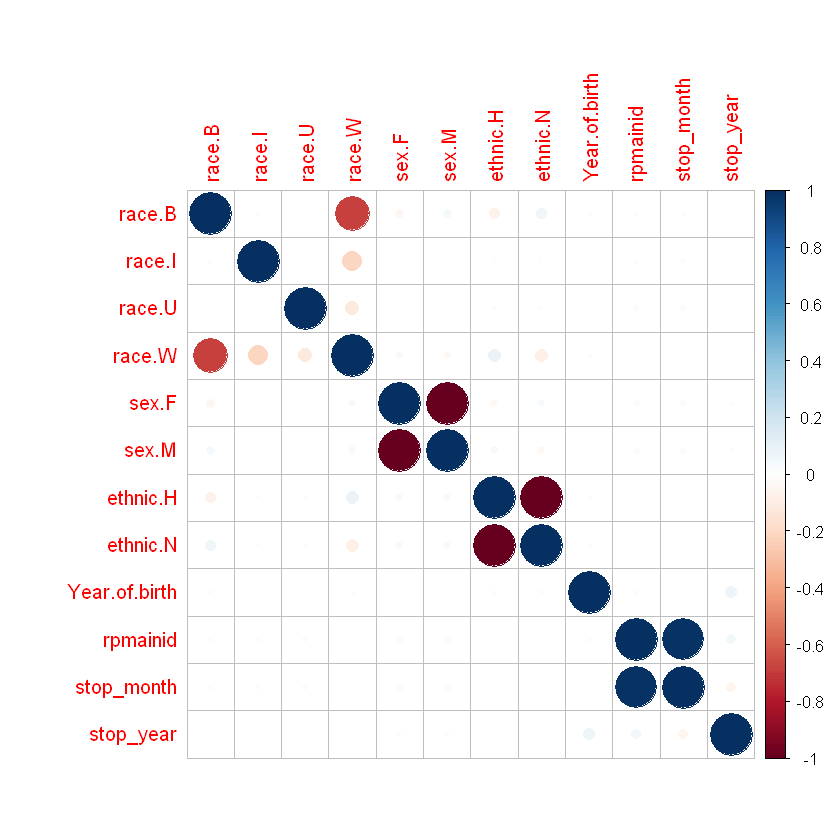

In [202]:
# cor(trainData_oneHot)
corrplot(cor(trainData_oneHot[,2:length(trainData_oneHot)]))#, method="circle")